# Part II - Prosper Slide Deck
## by Daniel Chang

## Investigation Overview

**In this investigation, I would like to examine the features of loans that could affect or predict a borrower's APR. Beside my main feature of interest, the APR, I am looking to see how certain variables might affect the APR's relationship with another variable. For example, some relationships that I examined are APR vs. loan amount and APR vs. rating, including the term's effect on the relationship between APR and rating. The categorical variables that I am interested in are: 'LoanStatus', 'IncomeVerifiable', 'EmploymentStatus', 'Term', and 'ProsperRating (Alpha)'. The numeric variables that I am interested in are: 'BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount', and 'DebtToIncomeRatio'.**



## Dataset Overview

**This dataset contains 113,937 loans with 81 variables on each loans, including loan amount, borrower rate, current loan status, borrower income, amongst others. The dataset is provided by Prosper via Udacity. While there are a number of data points-799 rows, to be exact- I have chosen not to remove them because I am interested in these anamolies and would like to study them with the dataset.**

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('prosperLoanData.csv')
# Subset the dataframe
cols = ['LoanStatus', 'BorrowerAPR', 'EmploymentStatus', 'StatedMonthlyIncome',
        'IncomeVerifiable', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'Term', 'ProsperRating (Alpha)']
loan_subset = loan_df[cols]

# group all values in "LoanStatus" containing "Past Due " and replace with "Past Due"
loan_subset.loc[loan_subset['LoanStatus'].str.contains('Past Due '), 'LoanStatus'] = 'Past Due'
loan_subset[loan_subset['LoanStatus']=="Past Due"]

# set dtype of 'LoanStatus' to category
loanstatus_order = loan_subset['LoanStatus'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = loanstatus_order)
loan_subset['LoanStatus'] = loan_subset['LoanStatus'].astype(ordered_var)

# set dtype of 'IncomeVerifiable' to category
income_order = loan_subset['IncomeVerifiable'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = income_order)
loan_subset['IncomeVerifiable'] = loan_subset['IncomeVerifiable'].astype(ordered_var)

# set dtype of 'EmploymentStatus' to category
employ_order = loan_subset['EmploymentStatus'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = employ_order)
loan_subset['EmploymentStatus'] = loan_subset['EmploymentStatus'].astype(ordered_var)

# set dtype of 'Term' to category
term_order = [12, 36, 60]
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = term_order)
loan_subset['Term'] = loan_subset['Term'].astype(ordered_var)

# set dtype of 'rating' to category
rating_order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ordered_var = pd.api.types.CategoricalDtype(categories = rating_order, ordered = True)
loan_subset['ProsperRating (Alpha)'] = loan_subset['ProsperRating (Alpha)'].astype(ordered_var)

loan_subset.shape

(113937, 9)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Borrower APR Distribution

**The distribution looks multimodal with small peaks at 0.1 and a bigger one at 0.2. Afterward, it goes on a downward trend with a peak at 0.3 and a sudden spike at 0.35. There are barely any loans above 0.42.**

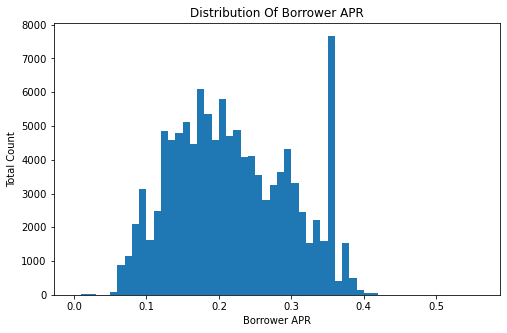

In [4]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8, 5
bins = np.arange(0, loan_subset.BorrowerAPR.max() + 0.05, 0.01)
plt.hist(data = loan_subset, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.ylabel('Total Count')
plt.title('Distribution Of Borrower APR')
plt.grid(False);

## Heatmap Of Numeric Values
**For this project,the numeric values are: 'BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount', and 'DebtToIncomeRatio'**

**From the heatmap, we can see that the correlation coefficient between BorrowerAPR and LoanOriginalAmount is -0.32. The relationship between Debt-to-Income Ratio and Stated Monthly Income is also negatively correlated.Something else we can make out is that the correlation between the original loan amount and stated monthly income is 0.20, meaning that it's positively correlated. This makes sense since the higher the income, the higher the loan you should be able to acquire.**

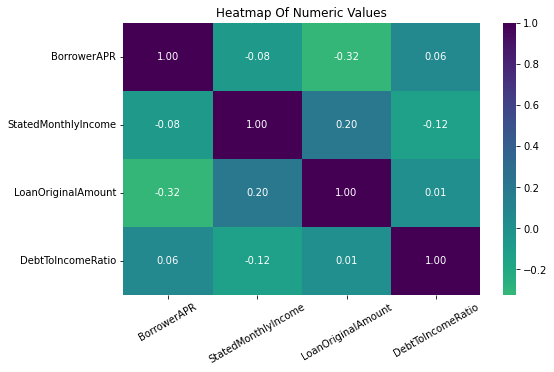

In [5]:
num_var = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'DebtToIncomeRatio']

sb.heatmap(loan_subset[num_var].corr(), annot = True, fmt = '0.2f',
          cmap = 'viridis_r', center = 0)
plt.xticks(rotation = 30)
plt.title('Heatmap Of Numeric Values');

## Loan Amount vs. Borrower APR
**After seeing the heatmap, I want to visualize the relationship between the loan amount and APR, using a scatterplot.**

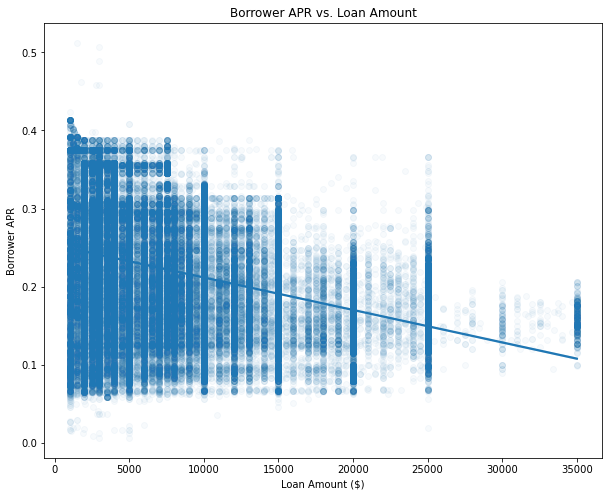

In [6]:
plt.figure(figsize = [10, 8])

sb.regplot(data = loan_subset, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha': 1/30})
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Loan Amount');

## Effect Of Rating on the Relationship Between APR And Loan Amount
**It seems that an individual's rating has some effect on the relationship between the original loan amount and APR. We can see the relationship gradually turn positive and get stronger as the rating increases.**

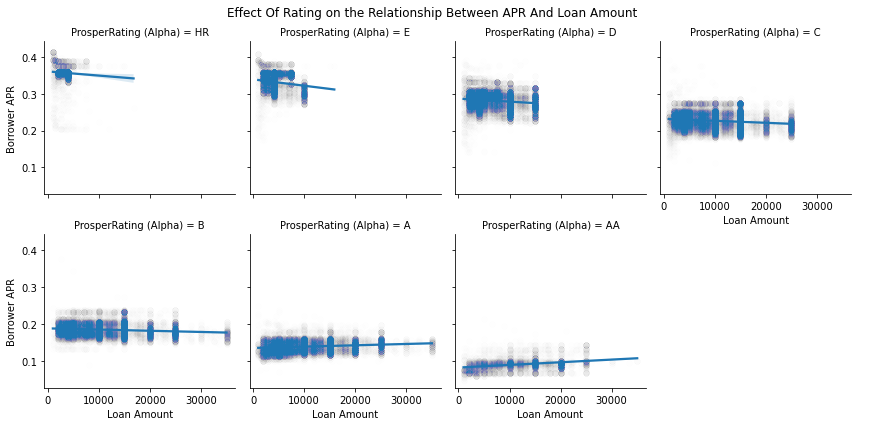

In [11]:
g = sb.FacetGrid(data = loan_subset, col = 'ProsperRating (Alpha)', col_wrap = 4)
g.map(sb.regplot,'LoanOriginalAmount', 'BorrowerAPR', x_jitter = 0.05, scatter_kws = {'alpha': 0.005})
g.add_legend();
g.set_xlabels('Loan Amount')
g.set_ylabels('Borrower APR')
plt.suptitle('Effect Of Rating on the Relationship Between APR And Loan Amount')
plt.subplots_adjust(top = 0.9);

## Borrower APR Across Terms and Ratings

**For each individual term over every rating, the APR decreases as the rating increases. Typically the APR decreases when the term is longer. Though the rating HR may not show due to insufficient data, the ratings E-C follow this. When it gets to rating B and higher, the longer ther term, the higher the APR for each individual level. It is interesting to note the sheer amount of outliers for 12-month terms across all ratings. It seems that this type of loan is more personalized or customermized for the individual borrower.**

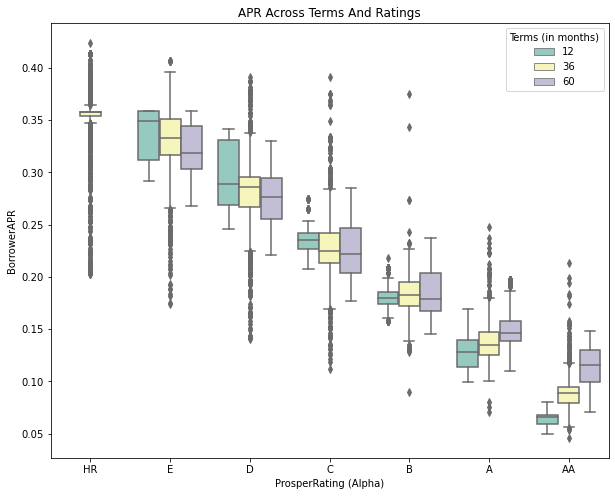

In [8]:
fig = plt.figure(figsize = [10, 8])
ax = sb.boxplot(x='ProsperRating (Alpha)', y='BorrowerAPR', hue='Term',
                 data=loan_subset, palette="Set3")
plt.title('APR Across Terms And Ratings')
plt.legend(title = 'Terms (in months)');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 